# Getting familiar with Data types and Visualization

In [218]:
from zipfile import ZipFile
Data = "/content/Data.zip"

with ZipFile(Data, 'r') as zip:
  zip.extractall()
  print('Done')

Done


1.   Step 1: Download the dataset files belong to the following data formats from internet. The files may belong to any dataset available online.
2.   Step 2: Read these files inside the python code. Some of the file formats cannot be read using default python packages. In this case, explore the python packages suitable for reading the files.
3.   Step 3: Print the properties of the data files such as size, shape, dimensions, etc.
4.   Step 4: Visualize each of these data files using graphs, diagrams, etc.


*    Table data visualization: line graph, bar graph, histogram chart, pie chart, scatter plot
*    Image visualization: image plot, 3d plot
*    Video visualization: video player
*    Audio visualization: audio player, spectrogram
*    Text visualization: Word cloud, bubble cloud (some more in http://vallandingham.me/textvis-talk/)


# Type 1

### Tabular, Spreadsheet and Interchange Data Formats

*   "Table" — generic tabular data (.dat), "CSV" — comma-separated values (.csv), "TSV" — tab-separated values (.tsv), “ARFF” - Attribute-Relation File Format (.arff) – Read and visualize the data
*   "XLS" — Excel spreadsheet (.xls), "XLSX" — Excel 2007 format (.xlsx), "ODS" — OpenDocument spreadsheet (.ods), "SXC" — OpenOffice 1.0 spreadsheet file (.sxc), "DIF" — VisiCalc data interchange format (.dif) – Read and visualize the data
*   "JSON" — JavaScript Object Notation (.json), "UBJSON" — Universal Binary JSON (.ubj), “HTML” – Hypertext Markup Language (.html), “XML” - eXtensible Markup Language (.xml)  - Read and Parse the data

In [219]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

#Packages
!pip install odfpy #to read ods files
#to read html files
!pip install lxml
#to read dcm images
!pip install pydicom

In [220]:
# TABLE DATA FORMAT

# 1. Reading CSV files
housePrices = pd.read_csv("/content/Data/Tabular, Spreadsheet and Interchange Format/house-prices.csv")
housePrices.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [221]:
# 2. Describe the data (only numerical data)
housePrices.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [222]:
print("Size:", housePrices.size, "\nShape:", housePrices.shape, "\nDimensions:", housePrices.ndim)

Size: 1024 
Shape: (128, 8) 
Dimensions: 2


In [223]:
housePrices["Bedrooms"].value_counts()

3    67
2    30
4    29
5     2
Name: Bedrooms, dtype: int64

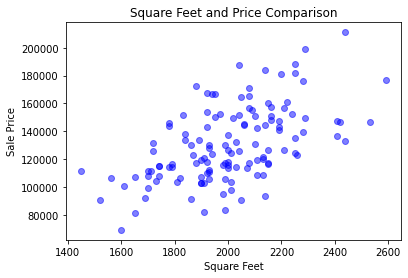

In [224]:
# 3.Visualization using CSV files
plt.scatter(housePrices["SqFt"], housePrices["Price"], color='blue', alpha = 0.5)
plt.title("Square Feet and Price Comparison")
plt.ylabel('Sale Price')
plt.xlabel("Square Feet");

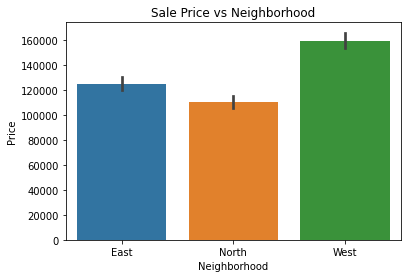

In [225]:
sns.barplot(x = housePrices["Neighborhood"], y = housePrices["Price"])
plt.title("Sale Price vs Neighborhood");

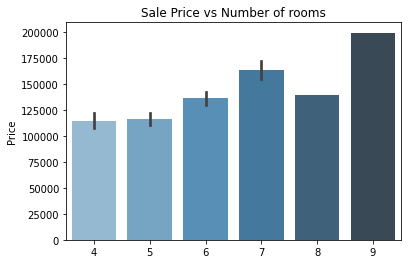

In [226]:
sns.barplot(x = housePrices["Bedrooms"] + housePrices["Bathrooms"], y = housePrices["Price"],palette="Blues_d")
plt.title("Sale Price vs Number of rooms");

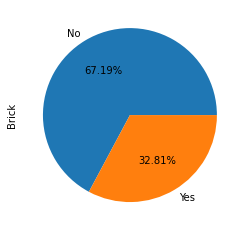

In [227]:
count = housePrices['Brick'].value_counts()
count.plot.pie(autopct='%.2f%%')
plt.show()

In [228]:
# 2.1 Reading TSV files
iris = pd.read_csv("/content/Data/Tabular, Spreadsheet and Interchange Format/iris.tsv", sep="\t")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,5.6,3.0,4.1,1.3,Iris-versicolor
2,5.4,3.4,1.7,0.2,Iris-setosa
3,5.0,3.0,1.6,0.2,Iris-setosa
4,6.9,3.2,5.7,2.3,Iris-virginica


In [229]:
# 2.2 Describe the data 
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [230]:
print("Size:", iris.size, "\nShape:", iris.shape, "\nDimensions:", iris.ndim)

Size: 750 
Shape: (150, 5) 
Dimensions: 2


In [231]:
iris["label"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: label, dtype: int64

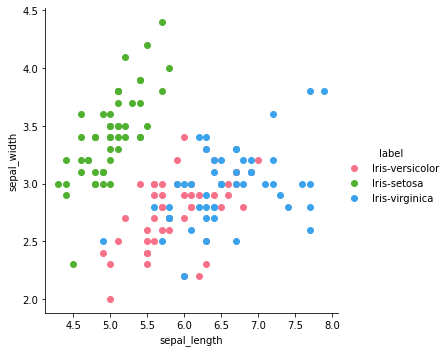

In [232]:
# 2.3 Visualization using TSV files
sns.FacetGrid(iris, hue="label", palette="husl", height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()
plt.show()

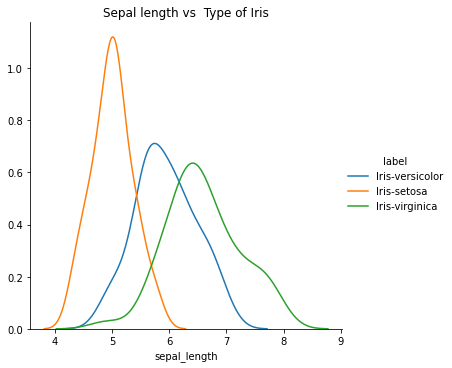

In [233]:
sns.FacetGrid(iris, hue="label", height=5) \
   .map(sns.kdeplot, "sepal_length") \
   .add_legend()
plt.title("Sepal length vs  Type of Iris")
plt.show()

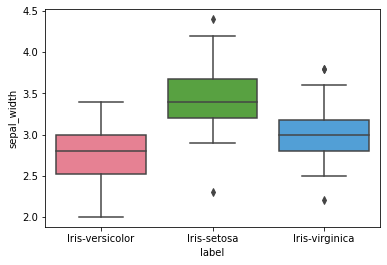

In [234]:
sns.boxplot(x="label", y="sepal_width", palette="husl", data=iris)
plt.show()

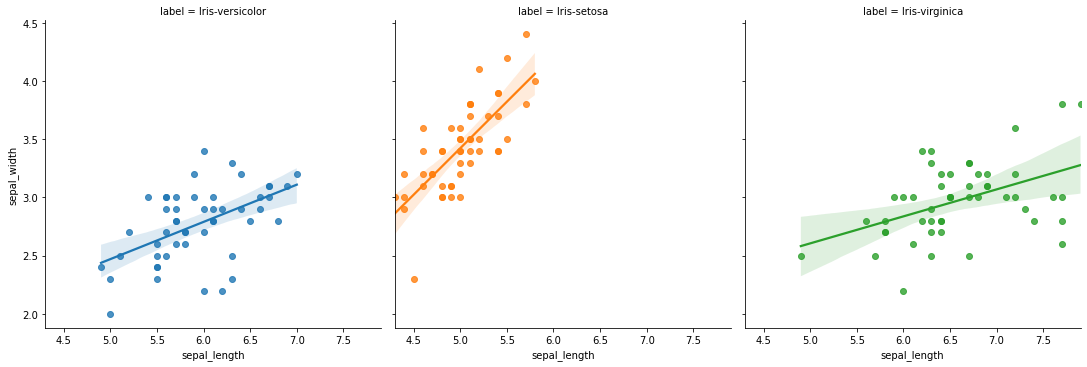

In [235]:
#Data with the regression line/boundary line
sns.lmplot(x='sepal_length',y='sepal_width',data=iris,hue='label',col='label')
plt.show()

In [236]:
# 3.1 Reading ARFF files
from scipy.io import arff
data = arff.loadarff('/content/Data/Tabular, Spreadsheet and Interchange Format/weather.arff.txt')
weather = pd.DataFrame(data[0])
#Removing b letter that appears in front of the string values
weather['outlook'] = weather['outlook'].str.decode('utf-8') 
weather['windy'] = weather['windy'].str.decode('utf-8') 
weather['play'] = weather['play'].str.decode('utf-8') 
weather.head()

,outlook,temperature,humidity,windy,play
0,sunny,85.0,85.0,FALSE,no
1,sunny,80.0,90.0,TRUE,no
2,overcast,83.0,86.0,FALSE,yes
3,rainy,70.0,96.0,FALSE,yes
4,rainy,68.0,80.0,FALSE,yes


In [237]:
# 3.2 Describe the data 
weather.describe()

,temperature,humidity
count,14.000000,14.000000
mean,73.571429,81.642857
std,6.571667,10.285218
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.000000,82.500000
75%,78.750000,90.000000
max,85.000000,96.000000


In [238]:
print("Size:", weather.size, "\nShape:", weather.shape, "\nDimensions:", weather.ndim)

Size: 70 
Shape: (14, 5) 
Dimensions: 2


In [239]:
weather["outlook"].value_counts()

rainy       5
sunny       5
overcast    4
Name: outlook, dtype: int64

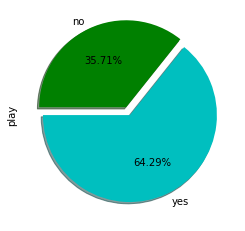

In [240]:
# 3.3 Visualization using ARFF files
count = weather['play'].value_counts()
count.plot.pie(autopct='%.2f%%', colors = ["c", "g"], shadow =True,
        startangle =180,explode =(0,0.1))
plt.show()

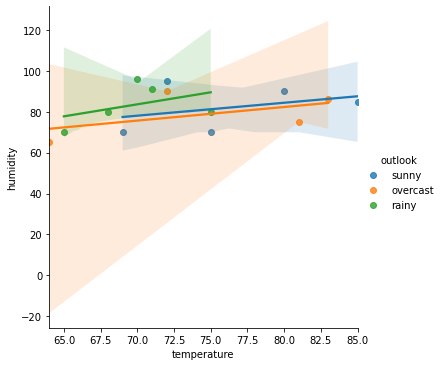

In [241]:
sns.lmplot(x='temperature', y='humidity', hue = 'outlook', data = weather)
plt.show()

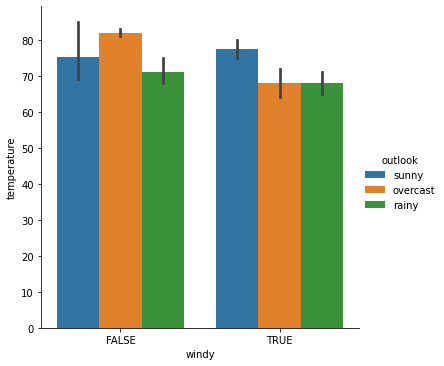

In [242]:
sns.catplot(x="windy", y="temperature", hue="outlook", kind="bar", data=weather)
plt.show()

In [243]:
# 2. SPREADSHEET DATA FORMAT

# 1.1 Reading XLS file
foodSales = pd.read_excel("/content/Data/Data File Formats/foodSales.xlsx")
foodSales.head(19)

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,TotalPrice
0,2020-01-01,East,Boston,Bars,Carrot,33,1.77,58.41
1,2020-01-04,East,Boston,Crackers,Whole Wheat,87,3.49,303.63
2,2020-01-07,West,Los Angeles,Cookies,Chocolate Chip,58,1.87,108.46
3,2020-01-10,East,New York,Cookies,Chocolate Chip,82,1.87,153.34
4,2020-01-13,East,Boston,Cookies,Arrowroot,38,2.18,82.84
5,2020-01-16,East,Boston,Bars,Carrot,54,1.77,95.58
6,2020-01-19,East,Boston,Crackers,Whole Wheat,149,3.49,520.01
7,2020-01-22,West,Los Angeles,Bars,Carrot,51,1.77,90.27
8,2020-01-25,East,New York,Bars,Carrot,100,1.77,177.00
9,2020-01-28,East,New York,Snacks,Potato Chips,28,1.35,37.80


In [244]:
# 1.2 Describe the XLS file data 
print("Size:", foodSales.size, "\nShape:", foodSales.shape, "\nDimensions:", foodSales.ndim)

Size: 1952 
Shape: (244, 8) 
Dimensions: 2


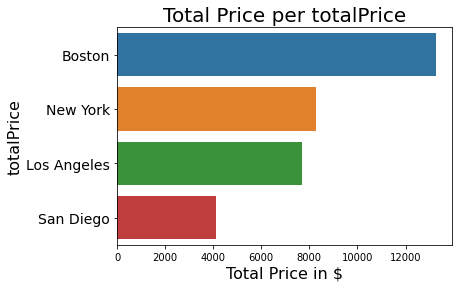

In [245]:
# 1.3 Visualization using XLS files
totalPrice = foodSales.groupby(['City']).sum()['TotalPrice']
totalPrice = pd.DataFrame(totalPrice.sort_values(ascending=False))
city = totalPrice.index
totalPrice.columns = ['Quantity']

ax = sns.barplot(y = city , x = 'Quantity', data=totalPrice, orient='h')
ax.set_xlabel(xlabel='Total Price in $', fontsize=16)
ax.set_ylabel(ylabel='totalPrice', fontsize=16)
ax.set_title(label='Total Price per totalPrice', fontsize=20)
ax.set_yticklabels(labels = city, fontsize=14)
plt.show();

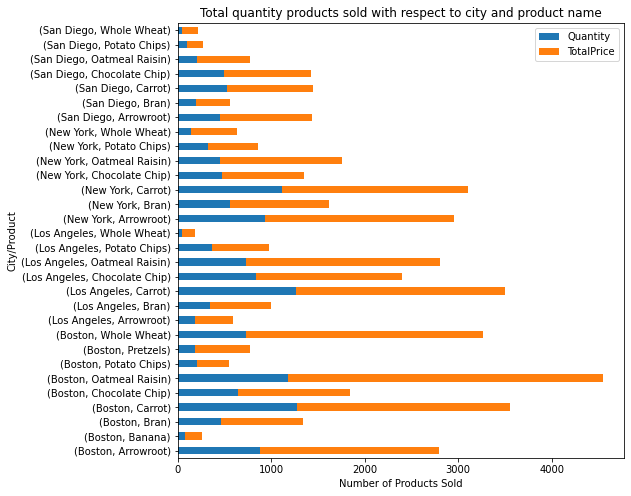

In [246]:
index = ['Quantity', 'TotalPrice']
totalQuantity = foodSales.groupby(["City","Product"])[index].sum()

totalQuantity.plot(kind="barh", stacked=True, figsize=(8,8))
plt.xlabel("Number of Products Sold")
plt.ylabel("City/Product")
plt.title("Total quantity products sold with respect to city and product name")
plt.show()

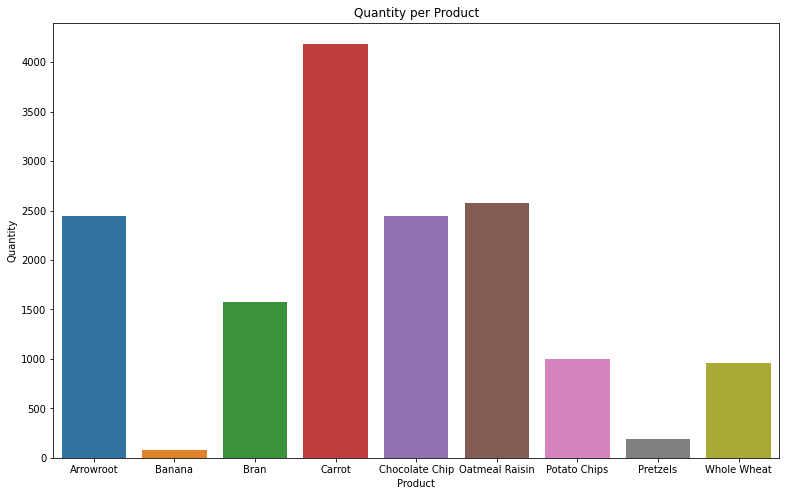

In [247]:
salesPerProduct = foodSales.groupby(['Product'],as_index=False)['Quantity'].agg('sum')

plt.figure(figsize=(13, 8))
ax = sns.barplot(x = "Product", y = "Quantity", ci = None, estimator = np.sum, data = salesPerProduct)
ax.set_title("Quantity per Product")
plt.show()

In [248]:
# 2.1 Reading ODS file (ODF is used by LibreOffice and OpenOffice)
players = pd.read_excel("/content/Data/Data File Formats/players.ods", engine="odf")
players.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [249]:
# 2.2 Describe the ODS file data 
print("Size:", players.size, "\nShape:", players.shape, "\nDimensions:", players.ndim)

Size: 6006 
Shape: (429, 14) 
Dimensions: 2


In [250]:
players.describe()

,rating,draft_year
count,429.000000,429.000000
mean,76.372960,2014.093240
std,5.657748,3.937678
min,67.000000,2001.000000
25%,72.000000,2012.000000
50%,75.000000,2015.000000
75%,79.000000,2017.000000
max,97.000000,2019.000000


In [251]:
# 2.3 Visualization using ODS files

labels = players['position'].value_counts().index
values = players['position'].value_counts().values

fig = px.pie(players, values=values, names=labels, title='Percentage of players positions', width=600, height=400)
fig.show()

In [252]:
ratingCount = players['rating'].value_counts().reset_index()
ratingCount.columns = ['rating', 'count']
fig = px.bar(ratingCount, x='rating', y="count", title='Players and their rating', width=600,color='rating',height=400)
fig.show()

In [253]:
players['salary'] = players['salary'].str.replace('$', '').astype(np.float64)
fig = px.histogram(players, x = "salary", nbins=100, title='Salary distribution', width=600,height=400, color_discrete_sequence=['gold'], opacity = 0.8)
fig.show()

In [254]:
# INTERCHANGE DATA FORMATS
# 1.1 Reading JSON Files
grades = pd.read_json('/content/Data/Interchange Data Formats/grades.json')
grades.head()

,Last name,First name,SSN,Test1,Test2,Test3,Test4,Final,Grade
0,Alfalfa,Aloysius,123-45-6789,40,90,100,83,49,D-
1,Alfred,University,123-12-1234,41,97,96,97,48,D+
2,Gerty,Gramma,567-89-0123,41,80,60,40,44,C
3,Android,Electric,087-65-4321,42,23,36,45,47,B-
4,Bumpkin,Fred,456-78-9012,43,78,88,77,45,A-


In [255]:
# 1.2 Describe the JSON file data 
grades.describe()

,Test1,Test2,Test3,Test4,Final
count,16.00000,16.000000,16.000000,16.00000,16.000000
mean,43.43750,53.312500,62.625000,59.25000,52.500000
std,4.74649,31.596875,34.271222,32.08842,22.426175
min,30.00000,11.000000,11.000000,-1.00000,4.000000
25%,41.00000,22.750000,28.250000,39.00000,43.750000
50%,44.00000,52.000000,79.000000,68.50000,46.500000
75%,46.25000,82.500000,91.500000,84.25000,56.250000
max,50.00000,97.000000,100.000000,97.00000,97.000000


In [256]:
print("Size:", grades.size, "\nShape:", grades.shape, "\nDimensions:", grades.ndim)

Size: 144 
Shape: (16, 9) 
Dimensions: 2


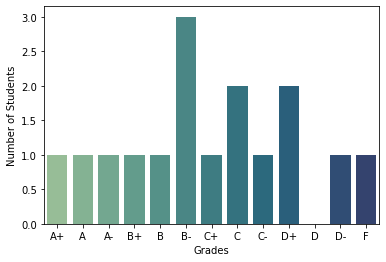

In [203]:
# 1.3 Visualization using JSON files
sns.countplot(x='Grade', data = grades, order=['A+','A','A-','B+','B','B-','C+','C', 'C-', 'D+', 'D', 'D-', 'F'], palette="crest")
plt.xlabel("Grades")
plt.ylabel("Number of Students")
plt.show()

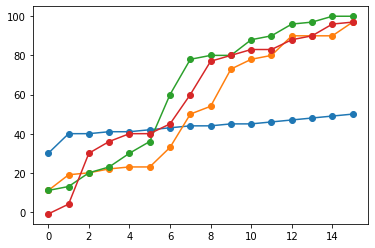

In [204]:
plt.plot(sorted(grades["Test1"]), marker = "o")
plt.plot(sorted(grades["Test2"]), marker = "o")
plt.plot(sorted(grades["Test3"]), marker = "o")
plt.plot(sorted(grades["Test4"]), marker = "o")
plt.show()

In [205]:
# 2.1 Reading HTML Files

dfs = pd.read_html('/content/Data/Interchange Data Formats/bmi.html')
bmi = dfs[0]
bmi.head()

,Sex,Weight (Sep),Weight (Apr),BMI (Sep),BMI (Apr)
0,M,72,59,22.02,18.14
1,M,97,86,19.70,17.44
2,M,74,69,24.09,22.43
3,M,93,88,26.97,25.57
4,F,68,64,21.51,20.10


In [206]:
# 2.2 Describe the HTML file data 
bmi.describe()

,Weight (Sep),Weight (Apr),BMI (Sep),BMI (Apr)
count,67.000000,67.000000,67.000000,67.000000
mean,65.059701,66.238806,22.030000,22.484179
std,11.285390,11.284327,3.308901,3.602527
min,42.000000,47.000000,15.080000,16.890000
25%,56.500000,58.000000,19.965000,20.230000
50%,64.000000,66.000000,21.730000,22.310000
75%,70.500000,70.000000,23.160000,23.860000
max,97.000000,105.000000,36.570000,40.860000


In [257]:
print("Size:", bmi.size, "\nShape:", bmi.shape, "\nDimensions:", bmi.ndim)

Size: 335 
Shape: (67, 5) 
Dimensions: 2


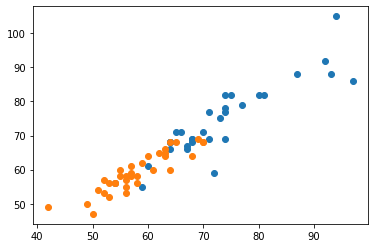

In [208]:
# 2.3 Visualization using HTML files
male = bmi[bmi["Sex"]  == 'M']
female = bmi[bmi["Sex"]  == 'F']

plt.scatter(x ='Weight (Sep)', y = 'Weight (Apr)', data = male)
plt.scatter(x ='Weight (Sep)', y = 'Weight (Apr)', data = female)
plt.show()

In [209]:
# 3.1 Reading XML Files
from lxml import objectify
xml = objectify.parse('/content/Data/Interchange Data Formats/foods.xml')
root = xml.getroot()

data=[]
for i in range(len(root.getchildren())):
    data.append([child.text for child in root.getchildren()[i].getchildren()])

waffles = pd.DataFrame(data)
waffles.columns = ['Name', 'Price', 'Description', 'Calories']
waffles.head()

,Name,Price,Description,Calories
0,Belgian Waffles,$5.95,Two of our famous Belgian Waffles with plenty ...,650
1,Strawberry Belgian Waffles,$7.95,Light Belgian waffles covered with strawberrie...,900
2,Berry-Berry Belgian Waffles,$8.95,Light Belgian waffles covered with an assortme...,900
3,French Toast,$4.50,Thick slices made from our homemade sourdough ...,600
4,Homestyle Breakfast,$6.95,"Two eggs, bacon or sausage, toast, and our eve...",950


In [210]:
# 3.2 Describe the XML file data 
print("Size:", waffles.size, "\nShape:", waffles.shape, "\nDimensions:", waffles.ndim)

Size: 20 
Shape: (5, 4) 
Dimensions: 2


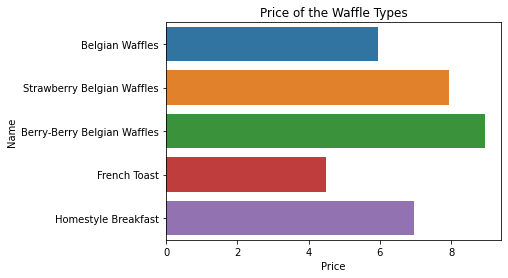

In [211]:
# 3.3 Visualization using XML files

waffles['Price'] = waffles['Price'].str.replace('$', '').astype(np.float64)
ax = sns.barplot(x = "Price", y = "Name", ci = None, estimator = np.sum, data = waffles)
ax.set_title("Price of the Waffle Types")
plt.show()

# Type 2

### Data File Formats

*   PKL – Pickle format, HDF5, Zip, SQL, MAT, NPY, NPZ – Read and display the data

In [212]:
# Add your code here


# Type 3

### Image Data Formats
*   JPG, PNG, BMP, TIFF – Read and display the image
*   3D medical Images: DICOM, MHA – Read and display the image


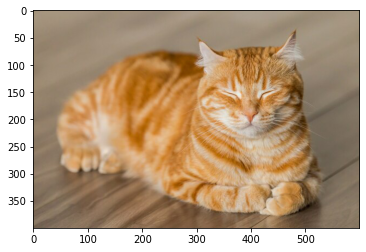

In [213]:
# 1. JPG Image
import matplotlib.image as mpimg

img=mpimg.imread("/content/Data/Picture/cat.jpg")
imgplot = plt.imshow(img)

[]

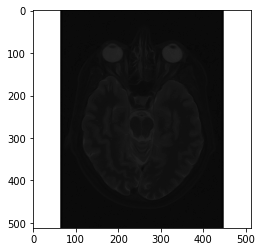

In [214]:
# 2. 3D Medical Images
import pydicom as dicom
import matplotlib.pylab as plt

# specify your image path
image_path = '/content/Data/Picture/MRBRAIN.DCM'
ds = dicom.dcmread(image_path)
plt.imshow(ds.pixel_array, cmap=plt.cm.gray_r)
plt.plot()

# Type 4

### Video Data Formats
*   MP4, AVI, MPEG – Read and play the video

# Type 5

### Audio Data Formats
*   MP3, MIDI, WAV – Read and play the audio

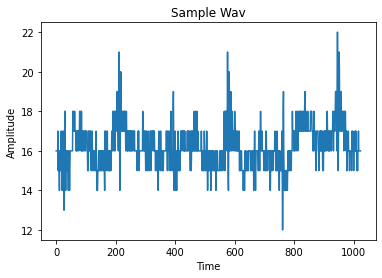

In [215]:
# WAV Data 
from scipy.io.wavfile import read

input_data = read("/content/Data/Audio Data/PinkPanther30.wav")

audio = input_data[1]
plt.plot(audio[0:1024])

plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Sample Wav")
plt.show()

In [216]:
# Add your code here



# Type 6

### Text Data Formats

*   TXT, PDF, DOC – Read and parse the data

In [217]:
# Reading same as .csv files 